# Aviation Data Analysis

## 1. Business Problem

A company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. 

The role of this analysis is to determine the safest and most suitable aircraft types, makes, and models for this business venture. The insights generated will help leadership make informed purchasing decisions that minimize operational risks and enhance safety.

### 1.1. Objectives

Our main objective is to identify the aircraft with the lowest risk and the highest suitability for a new aviation business by evaluating:

- **Aircraft safety risks**: What aircraft have the highest and lowest accident and fatality rates?
- **Incident causes**: What factors contribute to aircraft incidents and how can they be mitigated?
- **Actionable recommendations**: Based on safety data, which aircraft should the company consider for purchase?

#### 1.1.1. Aircraft characteristics and patterns
- Identify the most common aircraft makes and models
- Pinpoint aircraft with the lowest accident and fatality rates
- Analyze safety correlations with:
    - Aircraft type (Airplane, Helicopter etc.)
    - Number of engines (Single engine vs multiple engines)
    - Engine types (Turbo jet, Reciprocating etc.)

#### 1.1.2. Environmental and Operational factors/ patterns
- Investigate the relationship between weather conditions and aircraft safety
- Assess whether aircraft safety has improved or declined over time 

#### 1.1.3 Accident and Injury Analysis
- Analyse the distribution of accidents across different aircraft carriers
- Compare injury severities:
    - Fatal injuries
    - Serious injuries
    - Minor injuries
- Investigate variations in injury patterns among different carriers
- What's the relationship between aircraft damage level vs injury severity

### Expected Outcome

We expect to gain a comprehensive risk profile for different aircraft carriers and which particular aircraft is the best for a new business venture.




## 2. Data Understanding

The [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) we've been provided is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

This section will include:
- Data Description
- Data Exploration
- Data Quality

### 2.1. Data Description

The data dictionary of the dataset is as follows:

**Different file with the full data dictionary


*load libraries*

In [235]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Settings
pd.set_option('display.max_rows', 100)
# sns.set(style='whitegrid')

# Configure visualisations
%matplotlib inline

In [236]:
df = pd.read_csv("aircraft_safety/data/Aviation_Data.csv")
print(df.shape)
df.head()

/var/folders/rs/11qpr4qj5r5_0n7b0yg8xgp40000gn/T/ipykernel_4200/2531020676.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("aircraft_safety/data/Aviation_Data.csv")


(90348, 31)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


We can see a high level overview of our data and that we have 90,348 rows and 31 columns

**Summary of data**

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

From this we can see nearly all columns have missing data except the 'Investigation.Type'
We can also see the formats of the data are as we expect with most being text and a few numerical columns

In [238]:
# Numerical summary stats
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


From the general summary statistics  of the numerical columns we can see the min, max of columns amongst other statistics and from the overview above, the data looks okay with no obvious outliers, but this will be further investigated.

### 2.2. Data Exploration

In [239]:
# Checking for missing values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

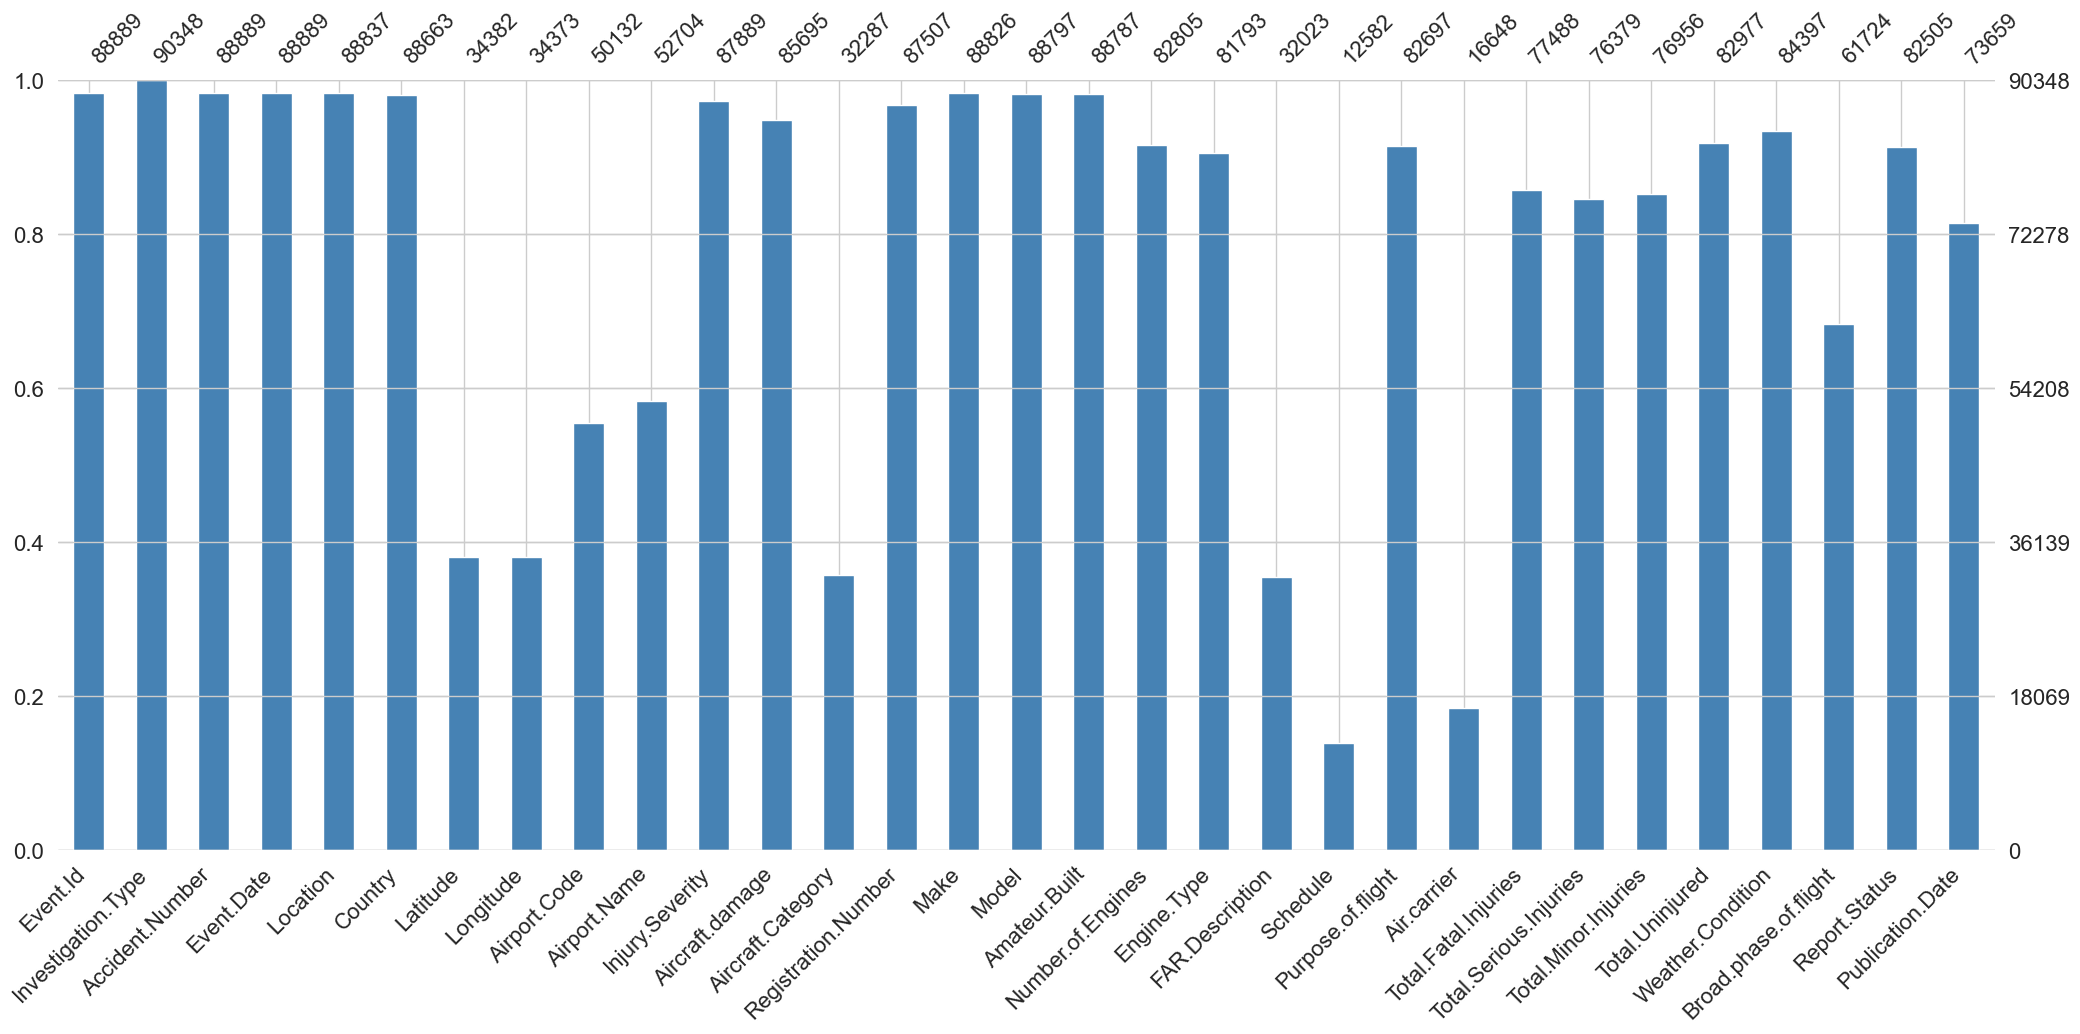

In [240]:
# Visualising missing values

msno.bar(df, color="steelblue");

We can see nearly all columns have missing data and we will remove some in the next stage or impute over the missing one.

In [241]:
# Duplicates
df["Event.Id"].duplicated().sum()

np.int64(2396)

In [242]:
df["Accident.Number"].duplicated().sum()

np.int64(1484)

In [243]:
df["Registration.Number"].duplicated().sum()

np.int64(11243)

After looking at some columns where we expected to find no duplicated such as the Event.Id or the Accident.Number we can see that some of the rows are duplicated and this could be a mistake but would be investigated later.

In addition, we can see that 11,243 aircraft registration numbers have been duplicated. This could mean they had a slight accident and could operate once again before another crash. 

In [244]:
# Number of countries
df["Country"].unique()

array(['United States', nan, 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
       'Se

From this output we can see a glimpse of all countries/territories that have been mentioned in the dataset. We can see a mix of known locations but others which might skew the dataset if used as a whole such as 'MU' or 'BLOCK 651A'.

In [245]:
print(len(df["Country"].unique()))

220


In [246]:
# Top 10 Most populous countries and their percentages
df["Country"].value_counts(normalize=True).head(10)

Country
United States     0.927647
Brazil            0.004218
Canada            0.004049
Mexico            0.004038
United Kingdom    0.003880
Australia         0.003384
France            0.002662
Spain             0.002549
Bahamas           0.002436
Germany           0.002425
Name: proportion, dtype: float64

From this we can see that the United States accounts for 92.7% of the dataset. This is a statistically significant sample to use. The next largest country is Brazil and that only accounts for 0.42%.

This will also make the analysis more reliable as different countries have different reporting standards and using only one country reduces the complexity and fragmentality of the  data.

In [247]:
# Dropping all countries except United States
df = df[df["Country"] == "United States"]
df["Country"].nunique()

1

In [248]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [249]:
# Checking for missing values in the United States dataset
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     11
Country                       0
Latitude                  49983
Longitude                 49993
Airport.Code              33176
Airport.Name              30678
Injury.Severity             108
Aircraft.damage            1979
Aircraft.Category         54094
Registration.Number         116
Make                         21
Model                        38
Amateur.Built                21
Number.of.Engines          1875
Engine.Type                3042
FAR.Description           54023
Schedule                  71951
Purpose.of.flight          2429
Air.carrier               67753
Total.Fatal.Injuries      10654
Total.Serious.Injuries    11375
Total.Minor.Injuries      10729
Total.Uninjured            5005
Weather.Condition           645
Broad.phase.of.flight     21090
Report.Status              2611
Publication.Date          14138
dtype: i

**Removing irrelevant data**

In [250]:
# Overview of some columns before dropping
df[["Airport.Name","Airport.Code","FAR.Description","Schedule", "Air.carrier", 
    "Report.Status","Publication.Date"]].head(10)

,Airport.Name,Airport.Code,FAR.Description,Schedule,Air.carrier,Report.Status,Publication.Date
0,NaN,NaN,NaN,NaN,NaN,Probable Cause,NaN
1,NaN,NaN,NaN,NaN,NaN,Probable Cause,19-09-1996
2,NaN,NaN,NaN,NaN,NaN,Probable Cause,26-02-2007
3,NaN,NaN,NaN,NaN,NaN,Probable Cause,12-09-2000
4,NaN,NaN,NaN,NaN,NaN,Probable Cause,16-04-1980
5,NaN,NaN,Part 129: Foreign,SCHD,Air Canada,Probable Cause,19-09-2017
6,NaN,NaN,NaN,NaN,NaN,Probable Cause,06-11-2001
7,BLACKBURN AG STRIP,NaN,Part 91: General Aviation,NaN,NaN,Probable Cause,01-01-1982
8,HANOVER,N58,Part 91: General Aviation,NaN,NaN,Probable Cause,01-01-1982
9,JACKSONVILLE INTL,JAX,NaN,NaN,NaN,Probable Cause,01-01-1982


In [251]:
# Copy of df before dropping columns
us_df = df.copy()

# Dropping latitude and longitue
us_df.drop(columns=["Latitude", "Longitude", "Airport.Name", "Airport.Code",
                    "FAR.Description","Schedule", "Event.Id", "Country", "Air.carrier", 
                    "Publication.Date","Accident.Number", "Report.Status", "Registration.Number",
                    "Purpose.of.flight", "Broad.phase.of.flight"], inplace=True)

# Quick overview
us_df.head()

,Investigation.Type,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,Accident,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK
1,Accident,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK
2,Accident,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC
3,Accident,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC
4,Accident,1979-08-02,"Canton, OH",Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC


I chose to drop these columns initially as they wouldn't add any benefit in our analysis.
The rationale for this is because the 'Event.Id' would be the unique identifier and wouldn't be needed. The other columns though insightful would not add any meaningful insights to the analysis.

**Removing duplicate data**

In [252]:
# Check for duplicates

def check_duplicates(df):
    
    duplicate_counts = {}

    for col in us_df.columns:
        duplicate_vals = us_df[col].duplicated(keep=False)
        duplicate_count = duplicate_vals.sum()
        duplicate_percentage = (duplicate_count / len(us_df)) * 100
        unique_vals = us_df[col].nunique()

        duplicate_counts[col] = {
            'Duplicates': duplicate_count,
            'Percentage': round(duplicate_percentage, 2),
            'Unique Values': unique_vals

        }

    return pd.DataFrame.from_dict(duplicate_counts, orient='index').sort_values(by='Duplicates', 
                                                                                ascending=False)

duplicates_df = check_duplicates(us_df)
print(duplicates_df)
    # print(f"Column: {col}, Duplicates: {duplicate_count}, Percentage: {duplicate_percentage:.2f}%")

                        Duplicates  Percentage  Unique Values
Investigation.Type           82248      100.00              2
Aircraft.damage              82248      100.00              4
Weather.Condition            82248      100.00              4
Amateur.Built                82248      100.00              2
Number.of.Engines            82247      100.00              7
Engine.Type                  82246      100.00             11
Aircraft.Category            82246      100.00             14
Total.Minor.Injuries         82235       99.98             45
Total.Serious.Injuries       82229       99.98             33
Total.Fatal.Injuries         82221       99.97             51
Injury.Severity              82219       99.96             56
Total.Uninjured              82172       99.91            349
Event.Date                   81215       98.74          14609
Make                         75782       92.14           8001
Model                        75212       91.45          11443
Location

From the above data, we have most of the data that would be beneficial for our analysis

**Addressing Structural Errors**

In [253]:
# Replacing . with _
us_df.columns = us_df.columns.str.replace('.', '_')

us_df.head()

,Investigation_Type,Event_Date,Location,Injury_Severity,Aircraft_damage,Aircraft_Category,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition
0,Accident,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK
1,Accident,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK
2,Accident,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC
3,Accident,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC
4,Accident,1979-08-02,"Canton, OH",Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC


In [254]:
print(us_df["Event_Date"].dtypes)

object


In [255]:
# Copy of data
us_df1 = us_df.copy()

# Converting Event_Date to datetime
us_df1["Event_Date"] = pd.to_datetime(us_df1["Event_Date"])

# Extracting year from Event_Date
us_df1["Year"] = us_df1["Event_Date"].dt.year

# Removing Event_Date column
us_df1.drop(columns=["Event_Date"], inplace=True)

us_df1.head()

,Investigation_Type,Location,Injury_Severity,Aircraft_damage,Aircraft_Category,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Year
0,Accident,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,1948
1,Accident,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,1962
2,Accident,"Saltville, VA",Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,1974
3,Accident,"EUREKA, CA",Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,1977
4,Accident,"Canton, OH",Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,1979


*Checking for inconsistent naming*

In [256]:
# Clean the Injury_Severity column by removing numbers
us_df1["Injury_Severity"] = us_df1["Injury_Severity"].str.replace(r"\(\d+\)", "", regex=True)

us_df1.head()


,Investigation_Type,Location,Injury_Severity,Aircraft_damage,Aircraft_Category,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Year
0,Accident,"MOOSE CREEK, ID",Fatal,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,1948
1,Accident,"BRIDGEPORT, CA",Fatal,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,1962
2,Accident,"Saltville, VA",Fatal,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,1974
3,Accident,"EUREKA, CA",Fatal,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,1977
4,Accident,"Canton, OH",Fatal,Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,1979


In [257]:
for col in us_df1.select_dtypes(include="object"): 
    print(f"Unique values in {col}:")
    print(us_df1[col].value_counts())  
    print("\n" + "-"*50 + "\n")

Unique values in Investigation_Type:
Investigation_Type
Accident    79906
Incident     2342
Name: count, dtype: int64

--------------------------------------------------

Unique values in Location:
Location
ANCHORAGE, AK       434
MIAMI, FL           200
ALBUQUERQUE, NM     196
HOUSTON, TX         193
CHICAGO, IL         184
                   ... 
Stanwood, IA          1
GALETON, PA           1
Auburn Hills, MI      1
Bignell, NE           1
Florence, AZ          1
Name: count, Length: 23030, dtype: int64

--------------------------------------------------

Unique values in Injury_Severity:
Injury_Severity
Non-Fatal      64870
Fatal          15026
Incident        1873
Minor            203
Serious          153
Unavailable       15
Name: count, dtype: int64

--------------------------------------------------

Unique values in Aircraft_damage:
Aircraft_damage
Substantial    61675
Destroyed      16425
Minor           2119
Unknown           50
Name: count, dtype: int64

-------------------

In [258]:
# Cleaning my text columns
def clean_text_columns(df, unwanted_values):
    """Cleans text columns by standardising format and removing unwanted values."""

    for col in df.select_dtypes(include="object"): 
        df[col] = df[col].str.lower().str.strip().str.capitalize()
        df = df[~df[col].isin(unwanted_values)]
    return df

# Unwanted values after scanning the output above
unwanted_values = ["UNK", "NONE", "Unknown", "Unk", "Other"]

# Apply function to clean the DataFrame
us_df1 = clean_text_columns(us_df1, unwanted_values)

# Check unique values after cleaning
for col in us_df1.select_dtypes(include="object"):  
    print(f"Unique values in {col}:")
    print(us_df1[col].value_counts())  
    print("\n" + "-"*50 + "\n")

Unique values in Investigation_Type:
Investigation_Type
Accident    77869
Incident     2259
Name: count, dtype: int64

--------------------------------------------------

Unique values in Location:
Location
Anchorage, ak      538
Miami, fl          269
Houston, tx        265
Chicago, il        246
Fairbanks, ak      244
                  ... 
Southington, oh      1
Lordstown, oh        1
Chandler, tx         1
Herlong, nv          1
Stanwood, ia         1
Name: count, Length: 17318, dtype: int64

--------------------------------------------------

Unique values in Injury_Severity:
Injury_Severity
Non-fatal      63355
Fatal          14510
Incident        1817
Minor            199
Serious          148
Unavailable        3
Name: count, dtype: int64

--------------------------------------------------

Unique values in Aircraft_damage:
Aircraft_damage
Substantial    60535
Destroyed      15840
Minor           2012
Name: count, dtype: int64

--------------------------------------------------


**Filtering Missing/Incorrect Data**

In [259]:
us_df1.head()

,Investigation_Type,Location,Injury_Severity,Aircraft_damage,Aircraft_Category,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Year
2,Accident,"Saltville, va",Fatal,Destroyed,NaN,Cessna,172m,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,Imc,1974
3,Accident,"Eureka, ca",Fatal,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,Imc,1977
4,Accident,"Canton, oh",Fatal,Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,Vmc,1979
5,Accident,"Boston, ma",Non-fatal,Substantial,Airplane,Mcdonnell douglas,Dc9,No,2.0,Turbo fan,NaN,NaN,1.0,44.0,Vmc,1979
6,Accident,"Cotton, mn",Fatal,Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,Imc,1981


In [260]:
states = pd.read_csv("aircraft_safety/data/US_State_Codes.csv")
states.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [261]:
#Extract the state abbreviation from 'Location' column
us_df1["state_abbrev"] = us_df1["Location"].str.split(", ").str[-1].str.upper()

us_df1[["Location", "state_abbrev"]].head()


,Location,state_abbrev
2,"Saltville, va",VA
3,"Eureka, ca",CA
4,"Canton, oh",OH
5,"Boston, ma",MA
6,"Cotton, mn",MN


In [262]:
us_df1["state_abbrev"].unique()

array(['VA', 'CA', 'OH', 'MA', 'MN', 'WA', 'NJ', 'FL', 'NM', 'AL', 'LA',
       'TX', 'OK', 'AR', 'UT', 'AK', 'PA', 'MI', 'GA', 'NC', 'NY', 'MT',
       'OR', 'NV', 'IN', 'AZ', 'MO', 'WY', 'IL', 'SC', 'MD', 'HI', 'CO',
       'WV', 'DC', 'ID', 'VT', 'MS', 'KS', 'NH', 'IA', 'WI', 'KY', 'CT',
       'TN', 'ME', 'SD', 'NE', 'RI', 'ND', 'DE', nan, 'PR', 'GU', 'GM',
       'AO', 'PO', 'UN', 'VI', 'PACIFIC OCEAN,', 'CHARLOTTE AMALI,',
       'ATLANTIC OCEAN,', 'VERMILLION 229,', ',', 'HIGH ISLAND 138,',
       'GULF OF MEXICO,', 'UNKNOWN,', 'CHRISTIANSTED,',
       'HIGH ISLAND A-442A,', 'ST. CROIX,', 'TAMUNING,', 'ST. THOMAS,',
       'CHARLOTTE AMALIE,', 'MAIN PASS 61A,', 'MOBILE BLOCK 114CC,',
       'AGANA,', 'SOUTH PASS 93A,', 'SOUTHERN TIMBALIER 52CA,', 'OBYAN,',
       'SHIP SHOAL 208H,', 'TINIAN ISLAND,', 'LA,', 'WEST DELTA 109,',
       'INARAJAN,', 'EUGENE ISLAND 182A,', 'SOUTH TIMBALIER PLATFORM,',
       'VIOSCA KNOLL 989,', 'WHITNEY,', 'SOUTH TIMBALIER 127,', 'SAIPAN,',
       '

In [263]:
# Defining valid states
valid_states = set(states["Abbreviation"].unique())

# Stripping spaces and commas
us_df1["state_abbrev"] = us_df1["state_abbrev"].str.strip(", ").str.upper()

# Replacing invalid values with nan
us_df1.loc[~us_df1["state_abbrev"].isin(valid_states), "state_abbrev"] = np.nan

# Step 3: Check remaining NaN values
print("Remaining NaN values in state_abbrev after cleaning:")
print(us_df1["state_abbrev"].isna().sum())

print(us_df1["state_abbrev"].unique())

Remaining NaN values in state_abbrev after cleaning:
93
['VA' 'CA' 'OH' 'MA' 'MN' 'WA' 'NJ' 'FL' 'NM' 'AL' 'LA' 'TX' 'OK' 'AR'
 'UT' 'AK' 'PA' 'MI' 'GA' 'NC' 'NY' 'MT' 'OR' 'NV' 'IN' 'AZ' 'MO' 'WY'
 'IL' 'SC' 'MD' 'HI' 'CO' 'WV' 'DC' 'ID' 'VT' 'MS' 'KS' 'NH' 'IA' 'WI'
 'KY' 'CT' 'TN' 'ME' 'SD' 'NE' 'RI' 'ND' 'DE' nan 'PR' 'GU' 'GM' 'AO' 'PO'
 'VI']


In [264]:
us_df1 = us_df1.dropna(subset=["state_abbrev"])

print(us_df1["state_abbrev"].isna().sum())
us_df1.head()

0


,Investigation_Type,Location,Injury_Severity,Aircraft_damage,Aircraft_Category,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Year,state_abbrev
2,Accident,"Saltville, va",Fatal,Destroyed,NaN,Cessna,172m,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,Imc,1974,VA
3,Accident,"Eureka, ca",Fatal,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,Imc,1977,CA
4,Accident,"Canton, oh",Fatal,Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,Vmc,1979,OH
5,Accident,"Boston, ma",Non-fatal,Substantial,Airplane,Mcdonnell douglas,Dc9,No,2.0,Turbo fan,NaN,NaN,1.0,44.0,Vmc,1979,MA
6,Accident,"Cotton, mn",Fatal,Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,Imc,1981,MN


In [265]:
# Merging dataframes
us_df1 = us_df1.merge(states, left_on="state_abbrev", right_on="Abbreviation", 
                      how="left", suffixes=("", "_state"))

print(us_df1.head())
print(50*"-")
print("Checking for Missing in the new columns")
print(us_df1["US_State"].isna().sum())




  Investigation_Type       Location Injury_Severity Aircraft_damage  \
0           Accident  Saltville, va           Fatal       Destroyed   
1           Accident     Eureka, ca           Fatal       Destroyed   
2           Accident     Canton, oh           Fatal       Destroyed   
3           Accident     Boston, ma       Non-fatal     Substantial   
4           Accident     Cotton, mn           Fatal       Destroyed   

  Aircraft_Category               Make Model Amateur_Built  Number_of_Engines  \
0               NaN             Cessna  172m            No                1.0   
1               NaN           Rockwell   112            No                1.0   
2               NaN             Cessna   501            No                NaN   
3          Airplane  Mcdonnell douglas   Dc9            No                2.0   
4               NaN             Cessna   180            No                1.0   

     Engine_Type  Total_Fatal_Injuries  Total_Serious_Injuries  \
0  Reciprocating    

In [266]:
us_df1.drop(columns=["state_abbrev", "Abbreviation","Location"],inplace=True)
us_df1.head()

,Investigation_Type,Injury_Severity,Aircraft_damage,Aircraft_Category,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Year,US_State
0,Accident,Fatal,Destroyed,NaN,Cessna,172m,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,Imc,1974,Virginia
1,Accident,Fatal,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,Imc,1977,California
2,Accident,Fatal,Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,Vmc,1979,Ohio
3,Accident,Non-fatal,Substantial,Airplane,Mcdonnell douglas,Dc9,No,2.0,Turbo fan,NaN,NaN,1.0,44.0,Vmc,1979,Massachusetts
4,Accident,Fatal,Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,Imc,1981,Minnesota


In [267]:
us_df1["Investigation_Type"].unique()

array(['Accident', 'Incident'], dtype=object)

In [268]:
# Dropping rows that aren't Accident or Incident
us_df1 = us_df1[us_df1["Investigation_Type"].isin(["Accident", "Incident"])]
us_df1["Investigation_Type"].unique()


array(['Accident', 'Incident'], dtype=object)

In [269]:
len(us_df1)

80035

In [270]:
us_df1["Injury_Severity"].unique()

array(['Fatal', 'Non-fatal', 'Incident', 'Unavailable', nan, 'Minor',
       'Serious'], dtype=object)

In [271]:
us_df1["Injury_Severity"].isna().sum()

np.int64(89)

In [272]:
us_df1.dropna(subset=["Injury_Severity"], inplace=True)
us_df1["Injury_Severity"].isna().sum()

np.int64(0)

In [273]:
us_df1.drop(us_df1[us_df1["Injury_Severity"] == "Unavailable"].index, inplace=True)

In [274]:
# # Clean the Injury_Severity column by removing numbers
# us_df1["Injury_Severity"] = us_df1["Injury_Severity"].str.replace(r"\(\d+\)", "", regex=True)

# us_df1.head()
# print(us_df1["Injury_Severity"].value_counts())


In [275]:
len(us_df1)

79943

In [276]:
us_df1["Aircraft_Category"].value_counts()

Aircraft_Category
Airplane             23874
Helicopter            2684
Glider                 449
Balloon                194
Gyrocraft              172
Weight-shift           159
Powered parachute       90
Ultralight              25
Wsft                     9
Blimp                    4
Powered-lift             3
Rocket                   1
Ultr                     1
Name: count, dtype: int64

In [277]:
us_df1["Aircraft_Category"].isna().sum()

np.int64(52278)

In [278]:
print("Unique Makes:")
print(us_df1["Make"].nunique())
print(20*"-")
print("Count of Na:")
print(us_df1["Make"].isna().sum())

Unique Makes:
7277
--------------------
Count of Na:
14


In [279]:
us_df1.dropna(subset=["Make"], inplace=True)
us_df1["Make"].isna().sum()

np.int64(0)

In [280]:
def check_missing_values(df):
    missing_counts = {}

    for col in df.columns:
        missing_count = df[col].isna().sum()  
        missing_percentage = (missing_count / len(df)) * 100
        unique_count = df[col].nunique()

        missing_counts[col] = {
            'Missing Values': missing_count,
            'Percentage': round(missing_percentage, 2),
            'Unique Values': unique_count
        }

    return pd.DataFrame.from_dict(missing_counts, orient='index').sort_values(by="Missing Values", 
                                                                              ascending=False)

# Get sorted missing values summary
missing_summary = check_missing_values(us_df1)

# Display results
print(missing_summary)

                        Missing Values  Percentage  Unique Values
Aircraft_Category                52271       65.40             13
Total_Serious_Injuries           11329       14.17             32
Total_Minor_Injuries             10680       13.36             45
Total_Fatal_Injuries             10613       13.28             51
Total_Uninjured                   4968        6.22            348
Engine_Type                       2888        3.61              9
Aircraft_damage                   1668        2.09              3
Number_of_Engines                 1053        1.32              7
Weather_Condition                  570        0.71              2
Model                               29        0.04          10346
Amateur_Built                       19        0.02              2
Injury_Severity                      0        0.00              5
Make                                 0        0.00           7277
Investigation_Type                   0        0.00              2
Year      

In [281]:
# Copy of df
us_df2 = us_df1.copy()

# Fill in some missing columns with 0
cols_to_fill = ["Total_Serious_Injuries", "Total_Minor_Injuries", "Total_Fatal_Injuries",
       "Total_Uninjured"]
us_df2[cols_to_fill] = us_df2[cols_to_fill].fillna(0)

# Drop columns with too many missing values
us_df2.dropna(subset=["Aircraft_damage", "Weather_Condition", "Amateur_Built",
                      "Model"], inplace=True)



missing_summary = check_missing_values(us_df2)
print(missing_summary)

                        Missing Values  Percentage  Unique Values
Aircraft_Category                51069       65.69             13
Engine_Type                       2276        2.93              9
Number_of_Engines                  840        1.08              6
Injury_Severity                      0        0.00              5
Aircraft_damage                      0        0.00              3
Make                                 0        0.00           7175
Model                                0        0.00           9995
Investigation_Type                   0        0.00              2
Amateur_Built                        0        0.00              2
Total_Fatal_Injuries                 0        0.00             47
Total_Serious_Injuries               0        0.00             30
Total_Minor_Injuries                 0        0.00             44
Total_Uninjured                      0        0.00            291
Weather_Condition                    0        0.00              2
Year      

We chose to drop these missing values as there wouldn't be a reasonable way to impute the missing data. The remaining missing values we left them as we aim to impute the missing values using the mode. We chose to use the mode as the aircraft_category, engine_type and number_of_engines can be determined by their make and model. This will ensure data accuracy and reduce bias.

We also chose to fill in the `cols_to_fill` with 0 because missing values in injury-related columns likely indicate that no injuries were recorded for that incident. Given that aircraft accident reports are thoroughly documented, it is reasonable to assume that an absence of reported injuries means there were none rather than an unknown value.

In [282]:
# us_df2['Number_of_Engines'] = us_df2.groupby(['Make', 'Model'])['Number_of_Engines'].transform(lambda x: x.fillna(x.mode()[0] 
#                                                                                                                   if not x.mode().empty else x.median()))
# us_df2['Aircraft_Category'] = us_df2.groupby(['Make', 'Model'])['Aircraft_Category'].transform(lambda x: x.fillna(x.mode()[0] 
#                                                                                                           if not x.mode().empty else 'Unknown'))
# us_df2['Engine_Type'] = us_df2.groupby(['Make', 'Model'])['Aircraft_Category'].transform(lambda x: x.fillna(x.mode()[0] 
#                                                                                                           if not x.mode().empty else 'Unknown'))
# missing_summary = check_missing_values(us_df2)
# print(missing_summary);

In [283]:
def group_imputation(df:pd.DataFrame, group_cols:list, target_col:list):
    """
    THis function imputes missing values in the target columns using the mode from group_cols.
    If there is no mode it will fall back to median (for numerical) or 'Unknown' (for categorical).

    Args:
        df (pd.DataFrame): dataframe
        group_cols (list): Columns to group by e.g. Make and Model
        target_col (list): Columns we want to impute e.g. Number of engines 
    """

    def impute(x):
        mode_val = x.mode()
        if not mode_val.empty:
            return x.fillna(mode_val[0]) # Fill with mode
        elif pd.api.types.is_numeric_dtype(x) and not x.dropna().empty:
            return x.fillna(x.median()) # Use median if data exists
        return x.dropna() # Drop NaN values if no mode or median is found 
            
    for col in target_col:
        df[col] = df.groupby(group_cols)[col].transform(impute)

    return df

In [284]:
us_df2 = group_imputation(us_df2, ["Make", "Model"], ["Number_of_Engines", 
                                                      "Aircraft_Category", "Engine_Type"])

missing_summary = check_missing_values(us_df2)
print(missing_summary)

                        Missing Values  Percentage  Unique Values
Aircraft_Category                10397       13.37             13
Engine_Type                        993        1.28              9
Number_of_Engines                  291        0.37              6
Injury_Severity                      0        0.00              5
Aircraft_damage                      0        0.00              3
Make                                 0        0.00           7175
Model                                0        0.00           9995
Investigation_Type                   0        0.00              2
Amateur_Built                        0        0.00              2
Total_Fatal_Injuries                 0        0.00             47
Total_Serious_Injuries               0        0.00             30
Total_Minor_Injuries                 0        0.00             44
Total_Uninjured                      0        0.00            291
Weather_Condition                    0        0.00              2
Year      

From the above function we can see that the most of the data has been imputed either through the mode of the make and model of the aircraft and if that isn't available with the median. The remaining values showcase the data that couldn't be meaningfully imputed by either functions and we would opt to drop them rather than impute them with incorrect information which would introduce bias.

In [285]:
# Dropping remaining missing values
us_df2.dropna(inplace=True)
missing_summary = check_missing_values(us_df2)
print(missing_summary)

                        Missing Values  Percentage  Unique Values
Investigation_Type                   0         0.0              2
Injury_Severity                      0         0.0              5
Aircraft_damage                      0         0.0              3
Aircraft_Category                    0         0.0             12
Make                                 0         0.0           3547
Model                                0         0.0           4814
Amateur_Built                        0         0.0              2
Number_of_Engines                    0         0.0              6
Engine_Type                          0         0.0              9
Total_Fatal_Injuries                 0         0.0             31
Total_Serious_Injuries               0         0.0             26
Total_Minor_Injuries                 0         0.0             31
Total_Uninjured                      0         0.0            229
Weather_Condition                    0         0.0              2
Year      

## 3. Data Analysis

This next step will be broken down in 2 main ways:
1. Univariate analyis
2. Bivariate analysis 

In [286]:
# Copy of df
us_df3 = us_df2.copy()

print("Shape of the dataframe:")
print(us_df3.shape)
print(50*"-")
print(us_df3.head())
print(50*"-")
print(us_df3.info())
print(50*"-")
print(us_df3.describe(include='all'))


Shape of the dataframe:
(66306, 16)
--------------------------------------------------
  Investigation_Type Injury_Severity Aircraft_damage Aircraft_Category  \
0           Accident           Fatal       Destroyed          Airplane   
1           Accident           Fatal       Destroyed          Airplane   
2           Accident           Fatal       Destroyed          Airplane   
3           Accident       Non-fatal     Substantial          Airplane   
4           Accident           Fatal       Destroyed          Airplane   

                Make Model Amateur_Built  Number_of_Engines    Engine_Type  \
0             Cessna  172m            No                1.0  Reciprocating   
1           Rockwell   112            No                1.0  Reciprocating   
2             Cessna   501            No                2.0      Turbo fan   
3  Mcdonnell douglas   Dc9            No                2.0      Turbo fan   
4             Cessna   180            No                1.0  Reciprocating   


### 3.1 Univariate Analysis

In [287]:
def plot_categorical(df:pd.DataFrame, col:str, title:str, xlabel:str, ylabel:str, 
                     txt_rotation:int=0, palette=None, hue=None, color=None):
    """
    Function to plot categorical data
    
    :param df: Name of the dataframe 
    :param col: Column of intereset
    :param title:  Title of the plot
    :param xlabel: X label of the plot
    :param ylabel: Y label of the plot
    """

    # Map binary variables to Yes or No
    # mapping = {0: 'No', 1: 'Yes'}  
    # if df[col].dtype == 'int64':  
    #     df[col] = df[col].map(mapping)  
        
    # Print summary stats
    print("Data Statistics:")
    print(df[col].value_counts())
    
    # sns.countplot(x=df[col], data=df)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(),
                palette=palette, hue=hue, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=txt_rotation, ha="right")
    plt.show();

Data Statistics:
Injury_Severity
Non-fatal    53940
Fatal        11430
Incident       696
Minor          148
Serious         92
Name: count, dtype: int64


/var/folders/rs/11qpr4qj5r5_0n7b0yg8xgp40000gn/T/ipykernel_4200/3562962170.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(),


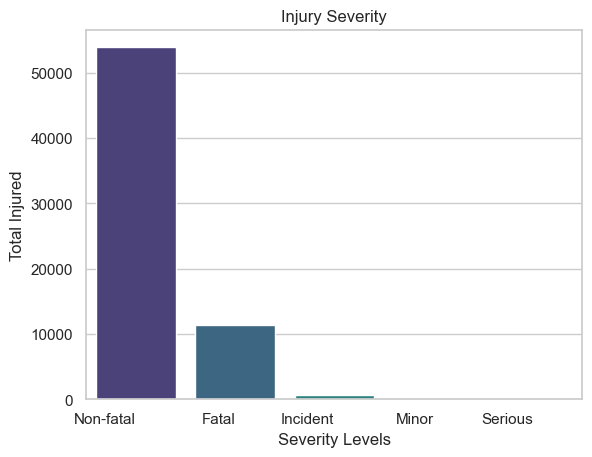

In [288]:
plot_categorical(df=us_df3, col="Injury_Severity", title="Injury Severity", 
                 xlabel="Severity Levels", ylabel="Total Injured", palette="viridis",)

Data Statistics:
Aircraft_damage
Substantial    52470
Destroyed      12530
Minor           1306
Name: count, dtype: int64


/var/folders/rs/11qpr4qj5r5_0n7b0yg8xgp40000gn/T/ipykernel_4200/3562962170.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts(),


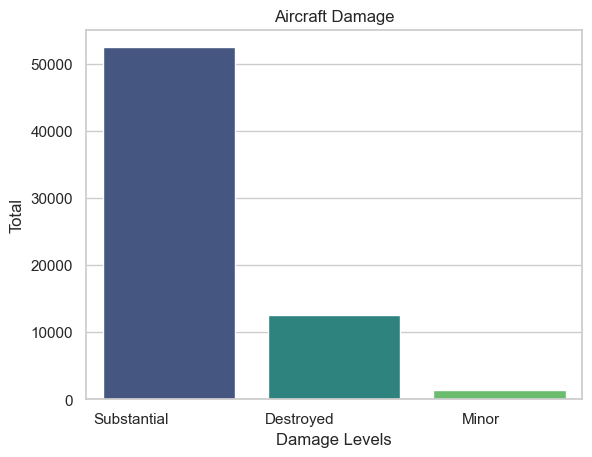

In [289]:
plot_categorical(df=us_df3, col="Aircraft_damage", title="Aircraft Damage", 
                 xlabel="Damage Levels", ylabel="Total", palette="viridis")

/var/folders/rs/11qpr4qj5r5_0n7b0yg8xgp40000gn/T/ipykernel_4200/1370961953.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_cats, palette="viridis")


Text(0, 0.5, 'Total')

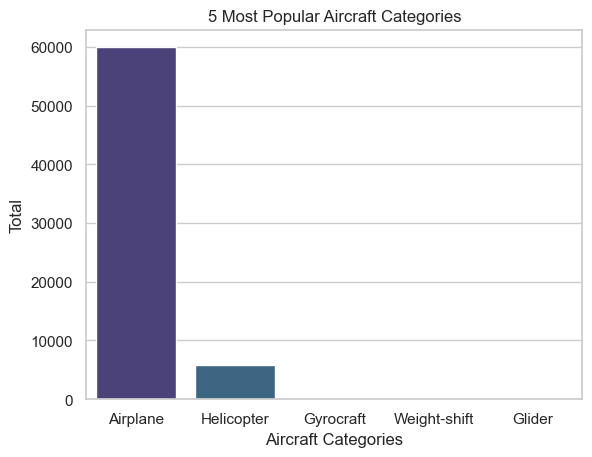

In [290]:
# plot_categorical(df=us_df3, col="Aircraft_Category", title="Types of Aircraft", 
#                  xlabel="Categories", ylabel="Total", txt_rotation=45)

# Top makes
top_cats = us_df3["Aircraft_Category"].value_counts().nlargest(5)

sns.barplot(top_cats, palette="viridis")
plt.title("5 Most Popular Aircraft Categories")
plt.xlabel("Aircraft Categories")
plt.ylabel("Total")


/var/folders/rs/11qpr4qj5r5_0n7b0yg8xgp40000gn/T/ipykernel_4200/2318146423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_makes, palette="viridis")


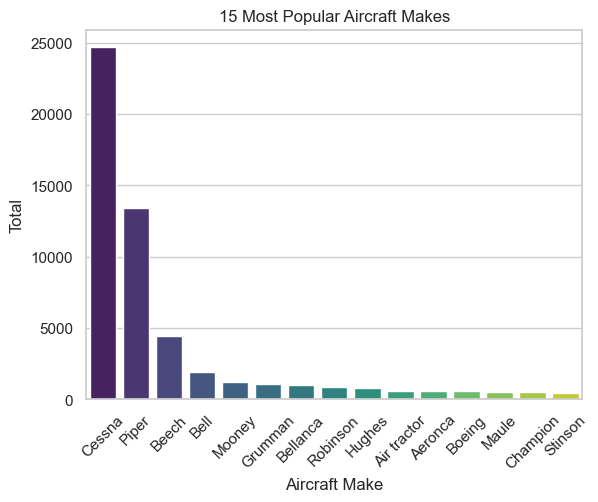

In [291]:
# Top makes
top_makes = us_df3["Make"].value_counts().nlargest(15)

sns.barplot(top_makes, palette="viridis")
plt.title("15 Most Popular Aircraft Makes")
plt.xlabel("Aircraft Make")
plt.ylabel("Total")
plt.xticks(rotation=45);


### 3.2 Bivariate Analysis

This section will set out to answer our objectives highlighted in the beginning.This section will be broken down into 3 main categories:
- Aircraft characteristics and patterns
- Environmental and Operational factors/ patterns
- Accident and Injury Analysis

#### 3.2.1 Accident and Injury Analysis

This section will aim to answer what types of accidents result in the most severe injuries and what types of aircraft have the highest fatality rates.

In [292]:
crosstab_data = pd.crosstab(us_df3['Injury_Severity'], us_df3['Aircraft_damage'])
crosstab_data

Aircraft_damage,Destroyed,Minor,Substantial
Injury_Severity,,,
Fatal,8173,69,3188
Incident,1,691,4
Minor,2,0,146
Non-fatal,4345,544,49051
Serious,9,2,81


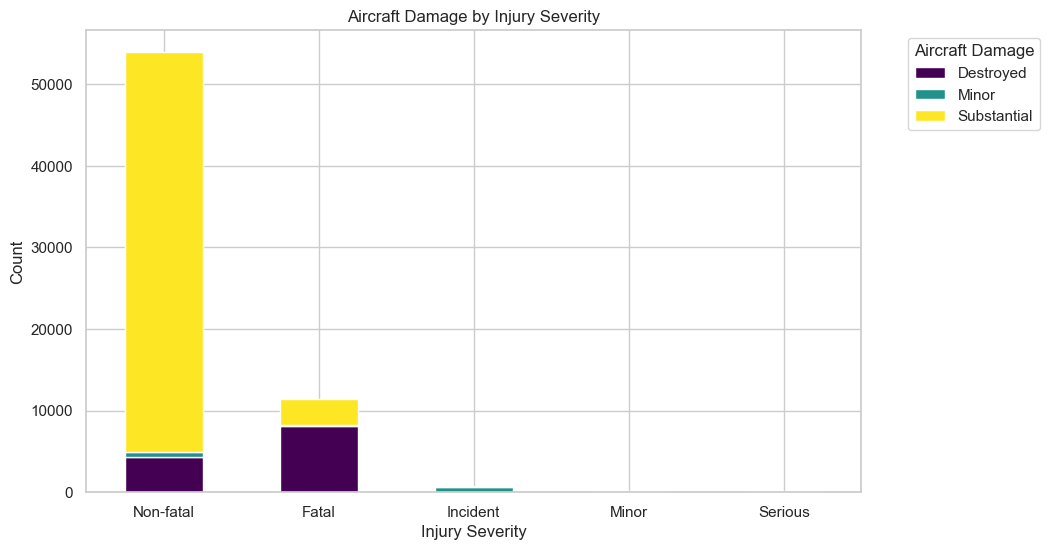

In [293]:
# Arrange in descending order
crosstab_data = crosstab_data.loc[crosstab_data.sum(axis=1).sort_values(ascending=False).index]

# Plotting it all together
crosstab_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.title('Aircraft Damage by Injury Severity')
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

A large proportion of fatal injuries (8,173 cases) are associated with destroyed aircraft.
Most fatal accidents involve destroyed aircraft, but some substantial damage (3,188 cases) also result in fatalities. Non-fatal injuries are much more common in substantial aircraft damage cases rather than destroyed ones.

Incidents (no injuries) overwhelmingly result in minor aircraft damage, reinforcing that these cases are low-risk. Minor aircraft damage almost never leads to serious or fatal injuries, suggesting effective safety measures in minor crashes.

Aircraft_Category
Airplane             59939
Helicopter            5823
Gyrocraft              184
Weight-shift           141
Glider                  98
Powered parachute       82
Ultralight              26
Wsft                     3
Rocket                   1
Balloon                  1
Name: Make, dtype: int64


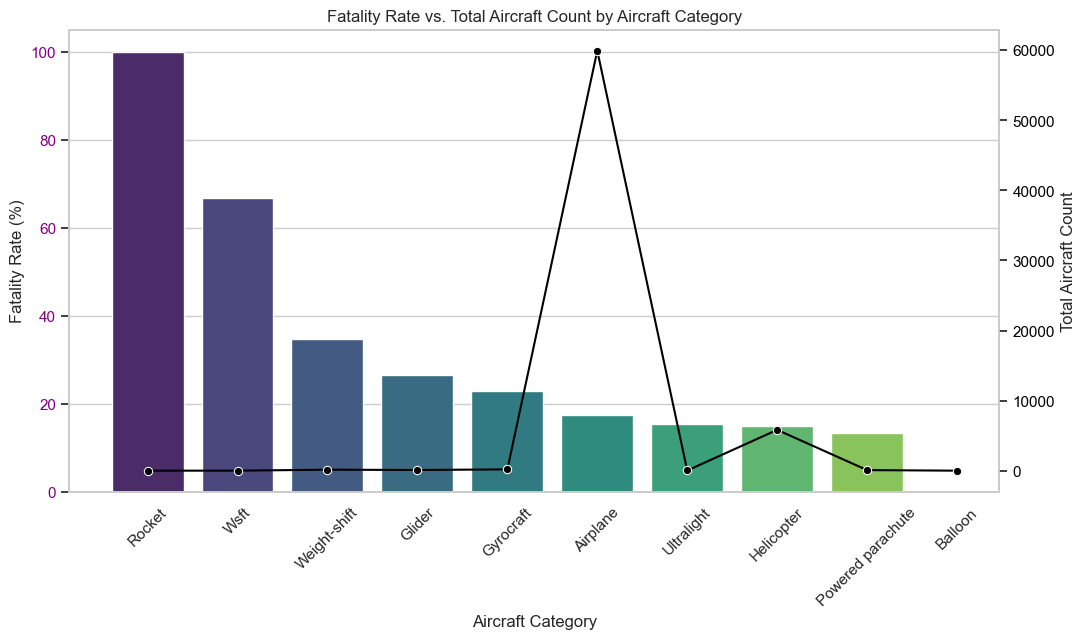

In [301]:
# Fatality rates according to aircraft category
type_fatality_rate = (
    us_df3[us_df3["Injury_Severity"] == "Fatal"]
    .groupby("Aircraft_Category")["Make"].count()
    / us_df3.groupby("Aircraft_Category")["Make"].count()
) * 100

type_fatality_rate = type_fatality_rate.sort_values(ascending=False).head(10)

# Total aircraft count by category that the data is accurately represented
total_aircraft_count = us_df3.groupby("Aircraft_Category")["Make"].count()
total_aircraft_count = total_aircraft_count.reindex(type_fatality_rate.index)
total_aircraft_sorted = total_aircraft_count.sort_values(ascending=False)
print(total_aircraft_sorted.head(10)) 


# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=type_fatality_rate.index, y=type_fatality_rate.values, palette="viridis", 
            hue=type_fatality_rate.index, ax=ax, legend=False)


ax.set_ylabel("Fatality Rate (%)")
ax.set_xlabel("Aircraft Category")
ax.set_title("Fatality Rate vs. Total Aircraft Count by Aircraft Category")
ax.tick_params(axis="y", labelcolor="purple")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


# Create secondary y-axis for total aircraft count
ax2 = ax.twinx()
sns.lineplot(
    x=type_fatality_rate.index,
    y=total_aircraft_count[type_fatality_rate.index],
    marker="o",
    color="black",
    ax=ax2
)

ax2.set_ylabel("Total Aircraft Count")
ax2.tick_params(axis="y", labelcolor="black")
ax2.yaxis.grid(False)

plt.show();

Assessing fatality rates across different aircraft categories is essential for evaluating risk levels and making informed business decisions. The data provides insights into which aircraft types are more prone to fatal accidents, helping to determine the safest options for commercial and private aviation operations.

**KEY FINDINGS**

🚨 *High Risk*

Rockets exhibit a 100% fatality rate, However, we only have 1 recorded values which suggests that conclusions drawn from this data may not be statistically significant.

Weight-Shift and WSFT aircraft also have high fatality rate


⚖️ *Medium Risk*
Airplanes and Helicopters are the most widely used aircraft types and exhibit moderate fatality rates:
    Airplanes: Approx. 18% fatality rate across 59,939 recorded cases.
    Helicopters: Approx. 15% fatality rate across 5,823 cases.
Their high usage combined with moderate fatality rates suggests that advanced safety measures, possibly heightened regulatory oversight, and aircraft design improvements contribute to reducing risk.

✅ *Low Risk*
Balloons demonstrate lower fatality rates, suggesting that accidents involving these aircraft are less likely to result in fatalities.

However, these aircraft types are not as widely used as airplanes, limiting their practical business applications.


**BALANCING RISK & AIRCRAFT USAGE**

Fatality rates alone do not provide a complete risk assessment. The total number of aircraft in each category leading to the fatalities must be considered:

    - High-risk categories with fewer aircraft may appear disproportionately dangerous due to limited data.
    - More common aircraft types, such as airplanes and helicopters, maintain moderate fatality rates despite their higher usage, making them statistically more reliable choices for business operations.

**BUSINESS IMPLICATIONS**

🚫 High-risk aircraft categories (e.g., Rockets, Weight-Shift) should be avoided due to their elevated fatality rates.

✅ The most viable aircraft category is not necessarily the one with the lowest fatality rate (e.g., Balloons), as their low usage limits their practicality.

💡 Airplanes appear to be the most suitable aircraft category, balancing safety and increased usage

The next sections will further analyze aircraft makes, models, and characteristics to identify the safest and most suitable options for investment.

#### 3.2.2. Aircraft Characteristics & Safety Patterns

This section will aim to answer which aircraft makes, models and categories have the lowest riks.